In [1]:
import pathlib
import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [2]:
wd = "../../"
bench_results_runtime_cis = f"{wd}/benchmarks/data/output/fetch_and_sum/*/*/*cis_runtime.txt"
bench_results_runtime_trans = f"{wd}/benchmarks/data/output/fetch_and_sum/*/*/*trans_runtime.txt"

bench_results_mem_cis = f"{wd}/benchmarks/data/output/fetch_and_sum/*/*/*cis_memory.txt"
bench_results_mem_trans = f"{wd}/benchmarks/data/output/fetch_and_sum/*/*/*trans_memory.txt"

tool_pretty_names = {
    "cooler_cooler": "cooler",
    "straw_hic": "straw",
    "hictk_hic": "hictk (hic)",
    "hictk_cooler": "hictk (cooler)",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen", "darkorange", "red"]

matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [3]:
def import_data(paths) -> pd.DataFrame:
    df = pd.concat((pd.read_table(path) for path in paths))
    df["tool"] = df["tool"] + "_" + df["format"]
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)
    return df.sort_values(["tool", "resolution"])

In [4]:
def plot_runtime(files, query_type):
    df = import_data(files)
    fig, ax = plt.subplots(1, 1, figsize=(12.8, 6.4))
    df = df.copy()
    df["median"] *= 1000

    sns.boxplot(df, x="resolution_pretty", y="median", hue="tool", palette=color_palette, fliersize=0, ax=ax)
    ax.set(
        title=f"Random queries ({query_type})",
        ylabel="Time (ms)",
        xlabel="Resolution (bp)",
    )

    ax.set_yscale("log", base=10)
    ax.tick_params(axis="x", rotation=45)

    ax.legend(
        handles=[
            Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
            Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
            Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
            Line2D([0], [0], color=color_palette[3], lw=3, label="straw"),
        ],
        labelspacing=0.2,
        loc="upper right",
    )

    loc = plticker.LogLocator(base=10, numticks=10)
    ax.yaxis.set_major_locator(loc)
    fig.tight_layout()

    return fig

def plot_memory(files, query_type):
    df = import_data(files)
    df["memory_mb"] = df["median"] / 1.0e3  # kb -> MB
    fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

    sns.lineplot(
        df,
        x="resolution_pretty",
        y="memory_mb",
        hue="tool",
        palette=color_palette,
        ax=ax,
        linewidth=3,
        seed=123456,
        legend=False,
    )


    ax.set(title="hic2cool (memory)", ylabel="Memory (MB)", xlabel="Resolution (bp)")

    ax.tick_params(axis="x", rotation=45)
    
    ax.legend(
        handles=[
            Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
            Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cooler)"),
            Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
            Line2D([0], [0], color=color_palette[3], lw=3, label="straw"),
        ],
        labelspacing=0.2,
        loc="upper right",
    )

    loc = plticker.MultipleLocator(base=500)
    ax.yaxis.set_major_locator(loc)

    fig.tight_layout()
    return fig

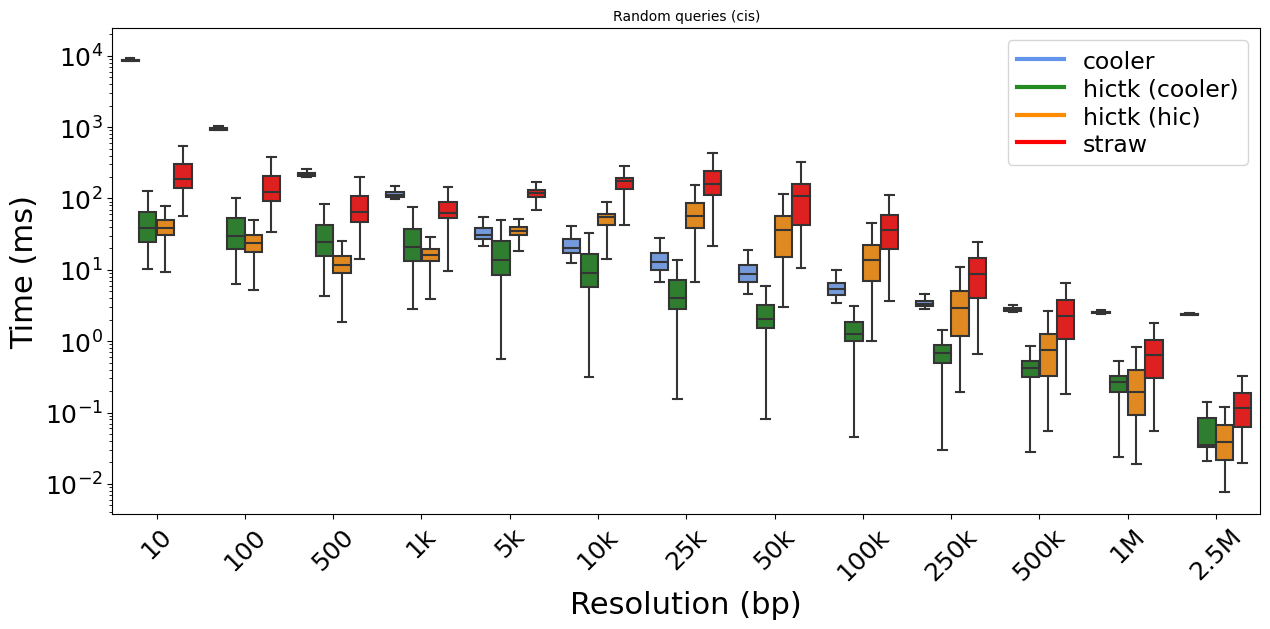

In [5]:
fig = plot_runtime(glob.glob(bench_results_runtime_cis), "cis")

fig.savefig("/tmp/fetch_and_sum_cis_runtime.png", dpi=600)
fig.savefig("/tmp/fetch_and_sum_cis_runtime.svg")

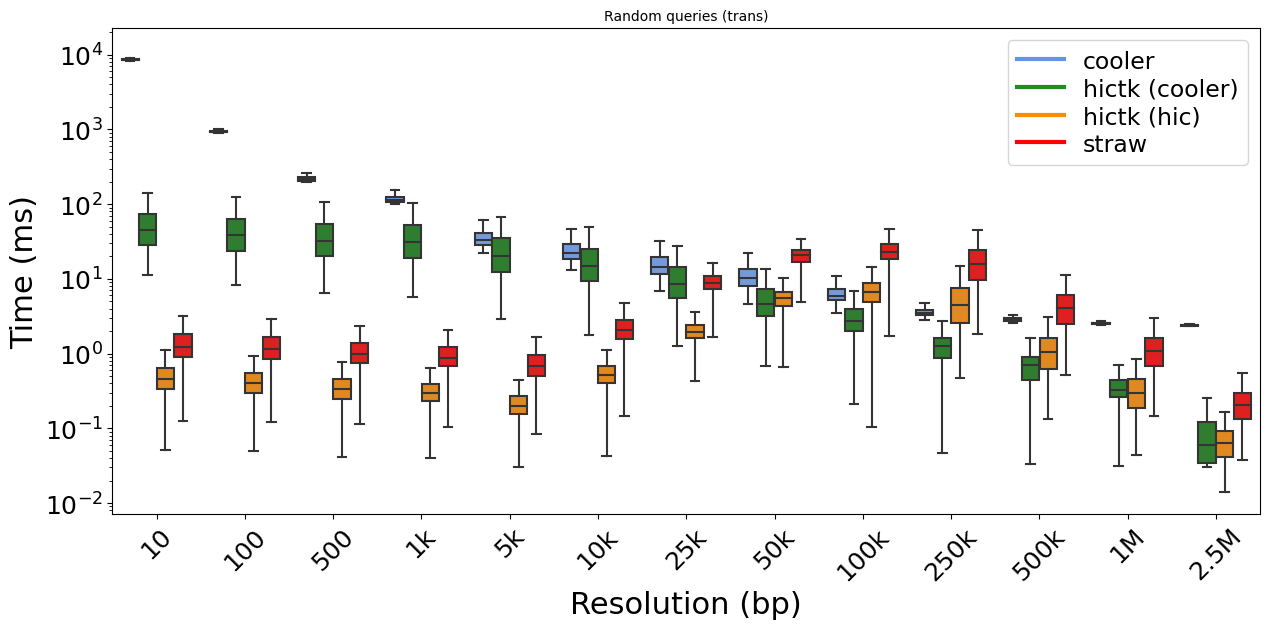

In [6]:
fig = plot_runtime(glob.glob(bench_results_runtime_trans), "trans")

fig.savefig("/tmp/fetch_and_sum_trans_runtime.png", dpi=600)
fig.savefig("/tmp/fetch_and_sum_trans_runtime.svg")

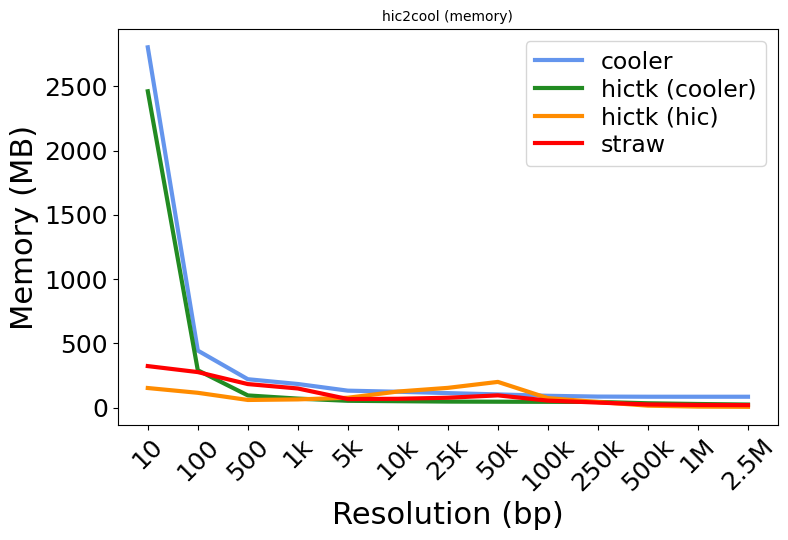

In [7]:
fig = plot_memory(glob.glob(bench_results_mem_cis), "cis")

fig.savefig("/tmp/fetch_and_sum_cis_memory.png", dpi=600)
fig.savefig("/tmp/fetch_and_sum_cis_memory.svg")

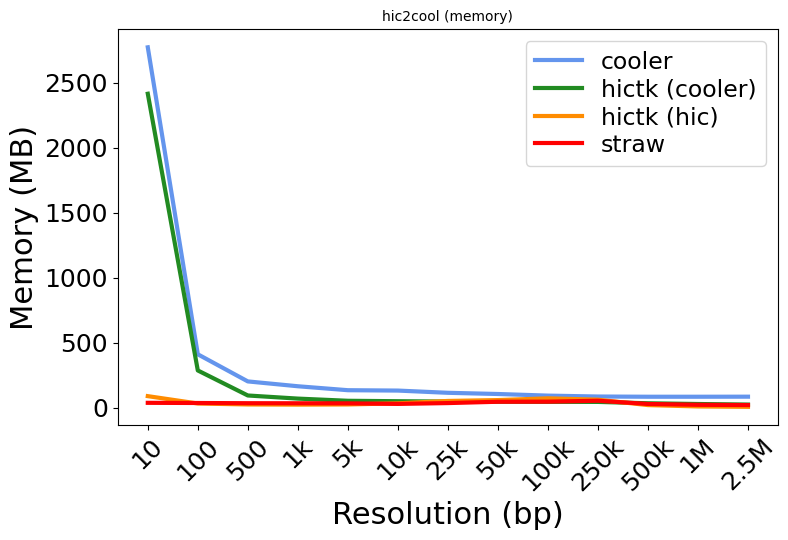

In [8]:
fig = plot_memory(glob.glob(bench_results_mem_trans), "trans")

fig.savefig("/tmp/fetch_and_sum_trans_memory.png", dpi=600)
fig.savefig("/tmp/fetch_and_sum_trans_memory.svg")